In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
from __future__ import division
import numpy as np
from setup import *
from OrbitalMotion import numerical_orbital_evolution, analytical_orbital_evolution, analytical_split
c,G,Msolar,AU, pc = univeral_constants()

In [37]:
#Choose system parameters 

#---Inner Binary---
m0 = 30*Msolar
m1 = 30*Msolar
f1 = 1e-3 #orbital frequency
a1 = semi_major_axis(m0+m1,f1)
e1 = 0.5 #eccentricity
g1 = np.pi/4
J1 = angular_momentum(m0,m1,e1,a1)#angular momentum. Eq. 12 of Randal

#---Outer Binary
beta=5
a2 = beta * a1
m2 = 10*Msolar
e2 = 0.6

#---Shared---
I = 60 * np.pi/180.0 #Inclination
nmodes = 20 #number of modes to sum over for GW
iota = 20 * np.pi/180  #angle of L vector w.r.t observer LOS 
D = 1e6 * pc #distance from source to observer 1Mpc


#---Integration settings
Tint = 0.1
fs = 1e-4

#---Info for user
status(fs, Tint)


Sampling frequency =  0.0001  Hz for an observation period of  0.1  years
Total number of integration steps is  315.36
Frequency range is:  3.170979198376459e-07  -  5e-05  Hz


In [38]:
#Integrate numerically
output = numerical_orbital_evolution(m0,m1,m2,a1,e1,g1,J1,e2,a2,I,4e-4,Tint)
numerical_motion = output[0]

K =  1.1565942657526629e+24
C =  -6.752505469155556e+23
lambda =  2.3869282539699428e+16 6.67e-11 300000000.0 6e+31 6e+31
I =  1.0471975511965976
J2 =  7.182511894390675e+46
Numerical orbital evolution has completed with fs =  0.0004  Hz and Tobs =  0.1  years


Plotting the orbital parameter evolution


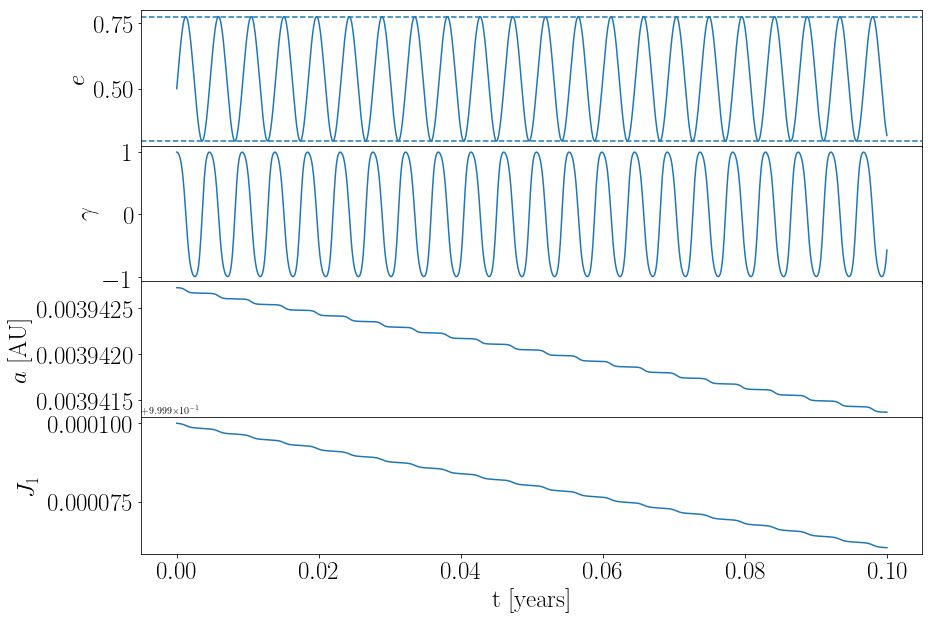

In [39]:
#and plot it
from plot import *
plot_motion(numerical_motion)